<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# **Hands-on lab: Exploratory Data Analysis - Laptops Pricing dataset**



# Objectives

After completing this lab you will be able to:

 - Visualize individual feature patterns
 - Run descriptive statistical analysis on the dataset
 - Use groups and pivot tables to find the effect of categorical variables on price
 - Use Pearson Correlation to measure the interdependence between variables


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(filepath, header=None)

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df = pd.DataFrame(df)

Print the first 5 entries of the dataset to confirm loading.


In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
1,0.0,0,Acer,4,2,1,5,14.0,0.5517241379310345,8,256,3.5280000000000005,978,Low,0,1
2,1.0,1,Dell,3,1,1,3,15.600000000000001,0.6896551724137931,4,256,4.851000000000001,634,Low,1,0
3,2.0,2,Dell,3,1,1,7,15.600000000000001,0.9310344827586208,8,256,4.851000000000001,946,Low,1,0
4,3.0,3,Dell,4,2,1,5,13.299999999999999,0.5517241379310345,8,128,2.6901,1244,Low,0,1


# Task 1 - Visualize individual feature patterns

### Continuous valued features
Generate regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price". Also, print the value of correlation of each feature with "Price".


## We first have to prepare the data

In [6]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64')

In [7]:
# Write your code below and press Shift+Enter to execute.
df.columns = df.iloc[0]

In [8]:
df.columns

Index([               nan,       'Unnamed: 0',     'Manufacturer',
               'Category',              'GPU',               'OS',
               'CPU_core', 'Screen_Size_inch',    'CPU_frequency',
                 'RAM_GB',   'Storage_GB_SSD',    'Weight_pounds',
                  'Price',     'Price-binned',   'Screen-Full_HD',
       'Screen-IPS_panel'],
      dtype='object', name=0)

In [9]:
## deleting the 1st col

df.drop(df.columns[0], axis=1, inplace=True)




In [10]:
df.drop(df.columns[0], axis=1, inplace=True)

In [11]:
df.drop(df.index[0], axis=0, inplace=True)

In [12]:
df

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
1,Acer,4,2,1,5,14.0,0.5517241379310345,8,256,3.5280000000000005,978,Low,0,1
2,Dell,3,1,1,3,15.600000000000001,0.6896551724137931,4,256,4.851000000000001,634,Low,1,0
3,Dell,3,1,1,7,15.600000000000001,0.9310344827586208,8,256,4.851000000000001,946,Low,1,0
4,Dell,4,2,1,5,13.299999999999999,0.5517241379310345,8,128,2.6901,1244,Low,0,1
5,HP,4,2,1,7,15.600000000000001,0.6206896551724138,8,256,4.21155,837,Low,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Lenovo,4,2,1,7,14.0,0.896551724137931,8,256,3.7485,1891,Medium,0,1
235,Toshiba,3,2,1,5,13.299999999999999,0.8275862068965517,8,256,2.646,1950,Medium,1,0
236,Lenovo,4,2,1,5,12.0,0.896551724137931,8,256,2.9988,2236,Medium,0,1
237,Lenovo,3,3,1,5,15.600000000000001,0.8620689655172414,6,256,5.292,883,Low,1,0


In [27]:
cols = ["Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"]
df[cols]=df[cols].astype(float)


## Now i want to set the 2nd row as the labels

In [14]:
df.columns

Index(['Manufacturer', 'Category', 'GPU', 'OS', 'CPU_core', 'Screen_Size_inch',
       'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'Weight_pounds', 'Price',
       'Price-binned', 'Screen-Full_HD', 'Screen-IPS_panel'],
      dtype='object', name=0)

In [15]:
cols = ["Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"]
y = df['Price']

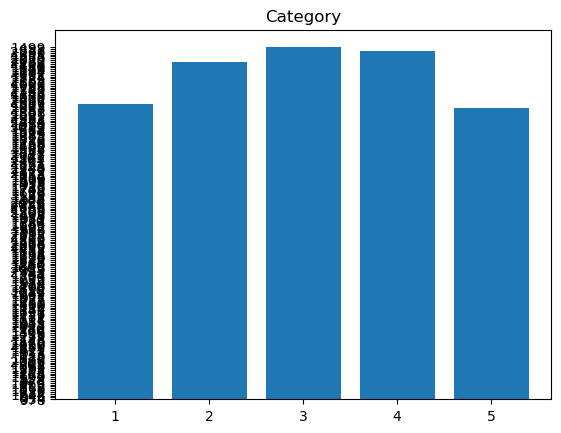

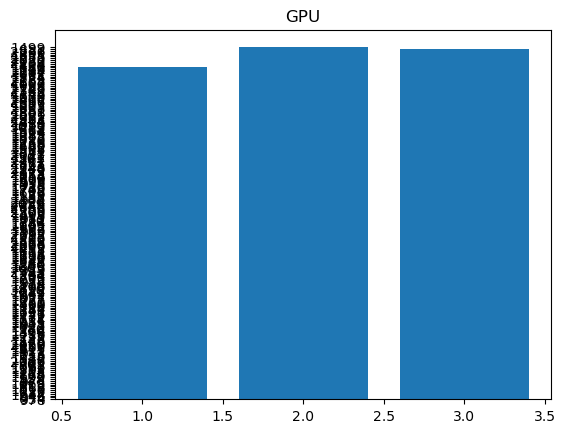

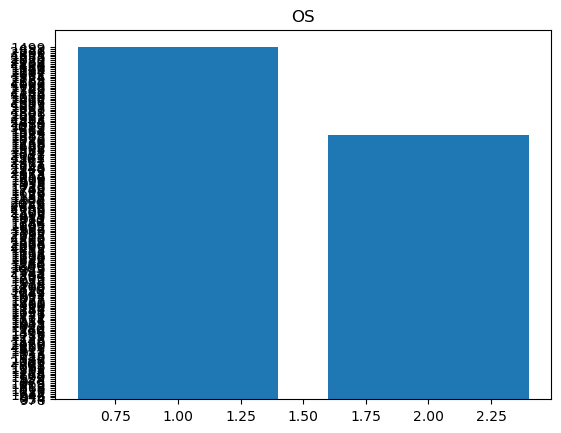

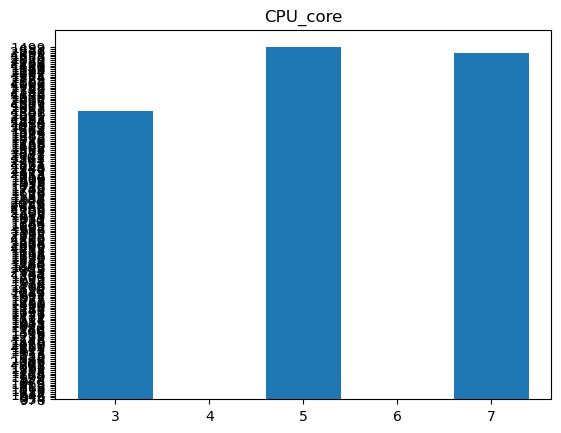

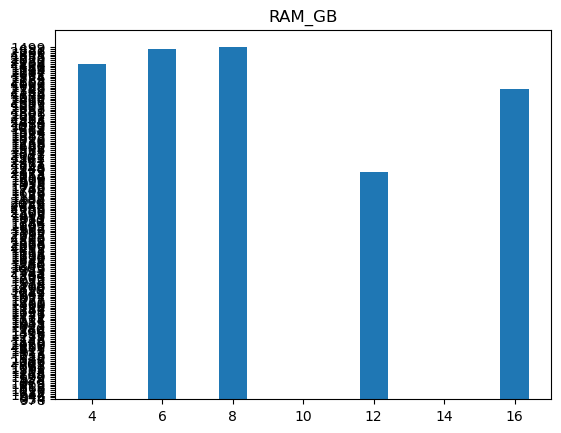

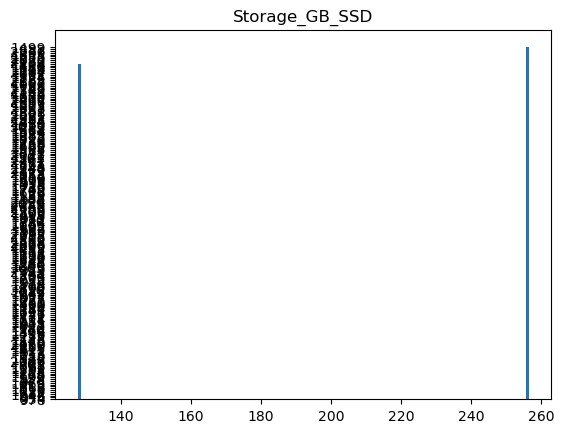

In [16]:
height=12
for j in cols:
    plt.bar(df[j], y)
    plt.title(j)
    plt.show()

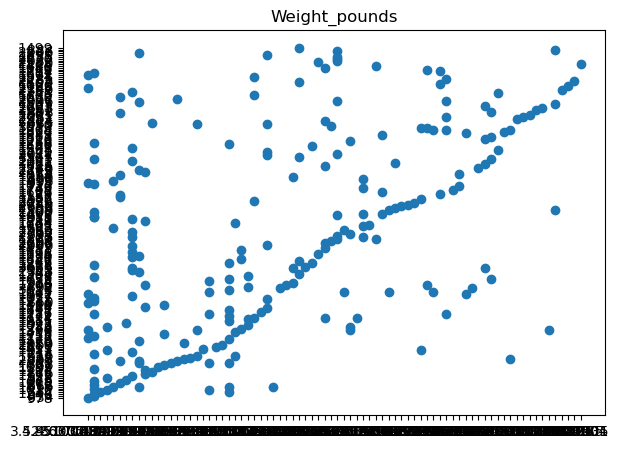

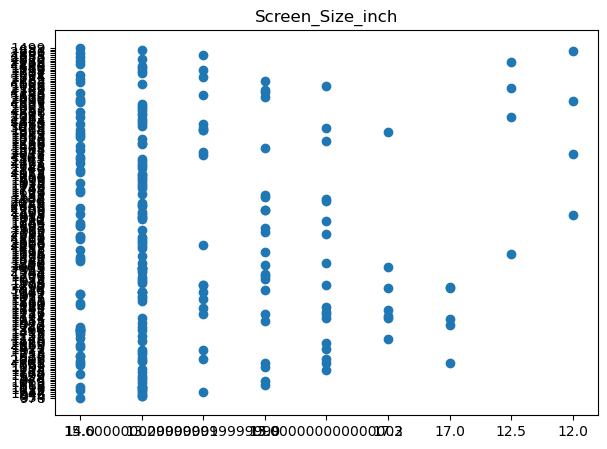

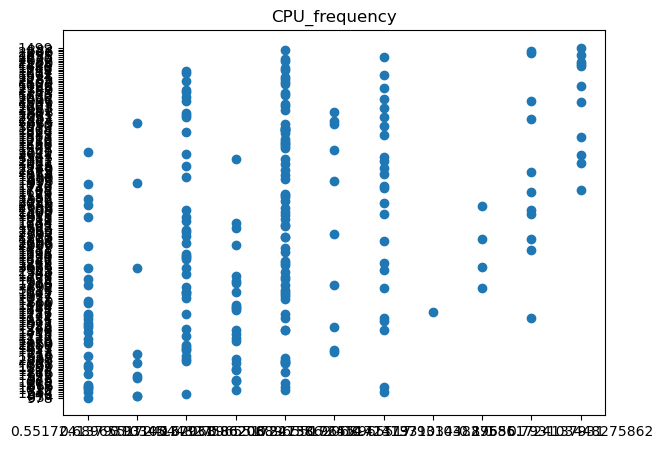

In [197]:

for i in features:
    plt.scatter(df[i], y)
    plt.title(i)
    plt.show()

Interpretation: "CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.


### Categorical features
Generate Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"


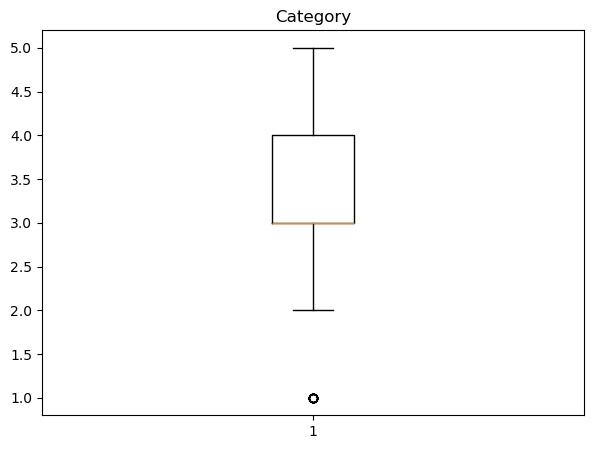

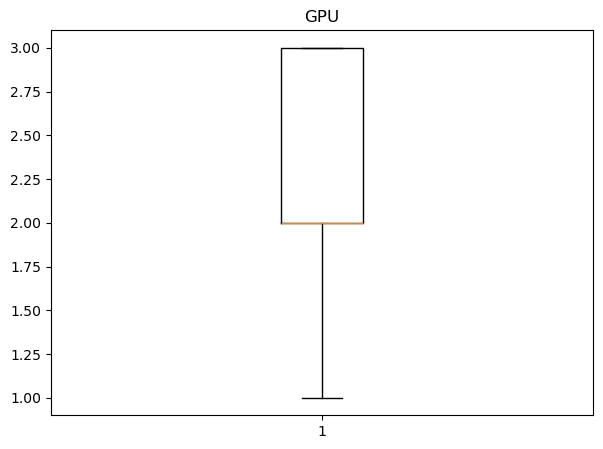

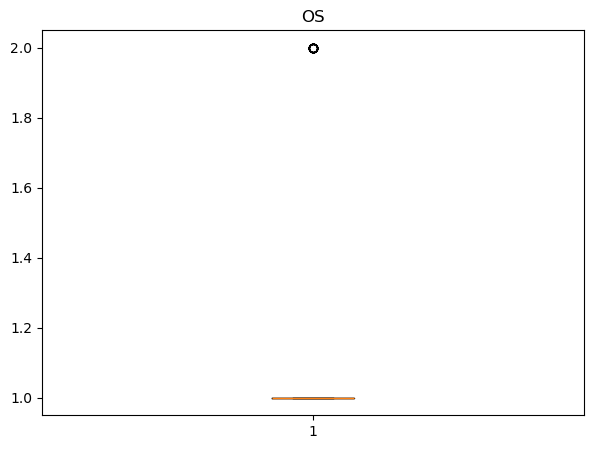

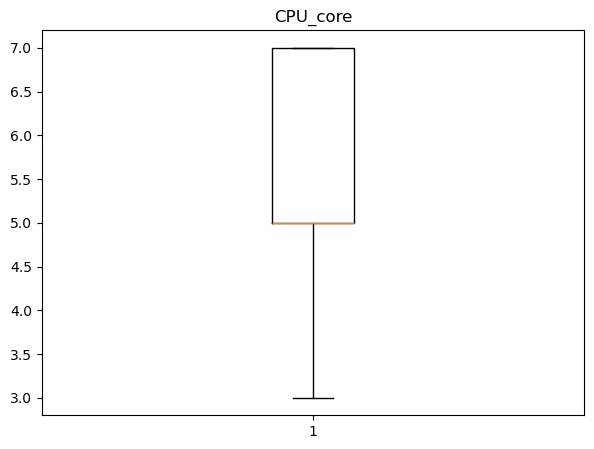

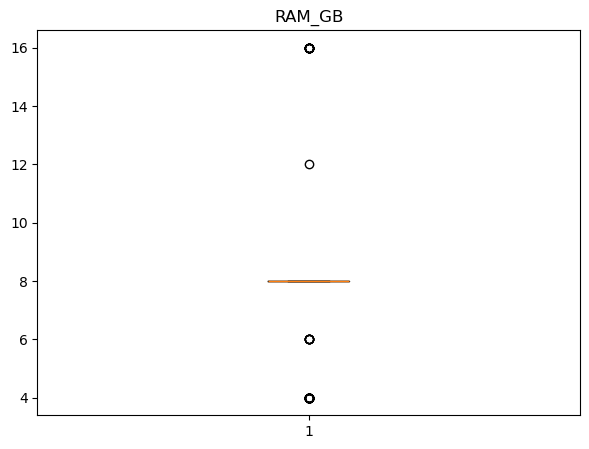

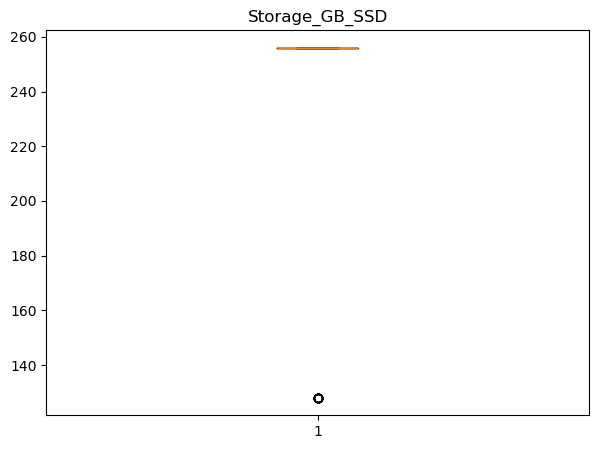

In [190]:
columns = ["Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"]
for i in columns:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

# Task 2 - Descriptive Statistical Analysis


Generate the statistical description of all the features being used in the data set. Include "object" data types as well.


In [230]:
# Write your code below and press Shift+Enter to execute
cols = df.columns
for i in cols:
    max = df[i].max
    min = df[i].min
    dis =  df[i].describe()
    
    print('The statistical description for', i, 'is \n', dis)
    print('//////////////////////')
    #print('The max value is', stats)
    print('The max vale for', i, 'is \n', max)
    print('//////////////////////')
    print('The min vale for', i, 'is \n', min)

The statistical description for Manufacturer is 
 count      238
unique      11
top       Dell
freq        71
Name: Manufacturer, dtype: object
//////////////////////
The max vale for Manufacturer is 
 <bound method Series.max of 1         Acer
2         Dell
3         Dell
4         Dell
5           HP
        ...   
234     Lenovo
235    Toshiba
236     Lenovo
237     Lenovo
238    Toshiba
Name: Manufacturer, Length: 238, dtype: object>
//////////////////////
The min vale for Manufacturer is 
 <bound method Series.min of 1         Acer
2         Dell
3         Dell
4         Dell
5           HP
        ...   
234     Lenovo
235    Toshiba
236     Lenovo
237     Lenovo
238    Toshiba
Name: Manufacturer, Length: 238, dtype: object>
The statistical description for Category is 
 count    238.000000
mean       3.205882
std        0.776533
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Category, dtype: float64
/////////////////////

# Task 3 - GroupBy and Pivot Tables

Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.


In [71]:
#Step 1: Create grouper
grouper = df.groupby(['Price'])

#Step 2: Filter column and apply aggregation
grouper[["GPU", "CPU_core"]].sum().reset_index()

,Price,GPU,CPU_core
0,527,2.0,3.0
1,558,2.0,3.0
2,616,1.0,3.0
3,634,3.0,6.0
4,685,2.0,3.0
...,...,...,...
188,3059,3.0,7.0
189,3073,3.0,7.0
190,3301,3.0,7.0
191,3665,3.0,7.0


In [79]:
data1 = df[["GPU", "CPU_core"]]

In [81]:
# Write your code below and press Shift+Enter to execute
# Create the Pivot table
table1 = pd.pivot_table(data=data1,index=df['Price'])
table1

,CPU_core,GPU
Price,,
527,3.0,2.0
558,3.0,2.0
616,3.0,1.0
634,3.0,1.5
685,3.0,2.0
...,...,...
3059,7.0,3.0
3073,7.0,3.0
3301,7.0,3.0


<Axes: xlabel='Price'>

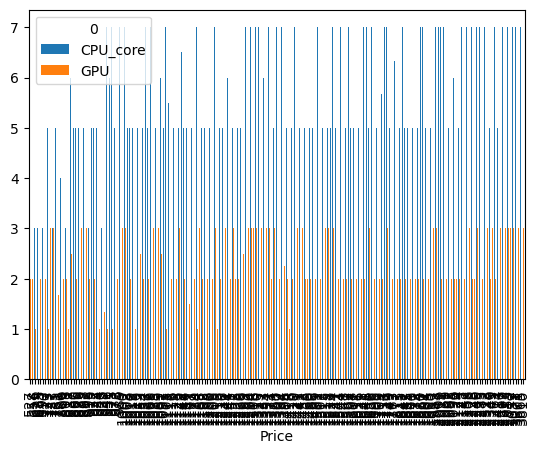

In [83]:
# Write your code below and press Shift+Enter to execute
# Create the Plot
table1.plot(kind='bar')

# Task 4 - Pearson Correlation and p-values

Use the `scipy.stats.pearsonr()` function to evaluate the Pearson Coefficient and the p-values for each parameter tested above. This will help you determine the parameters most likely to have a strong effect on the price of the laptops.


In [ ]:
# Write your code below and press Shift+Enter to execute

In [93]:
x = df["CPU_core"]
y = df["Price"]
res = stats.pearsonr(x, y)

res

PearsonRResult(statistic=0.45939777733551157, pvalue=7.912950127009034e-14)

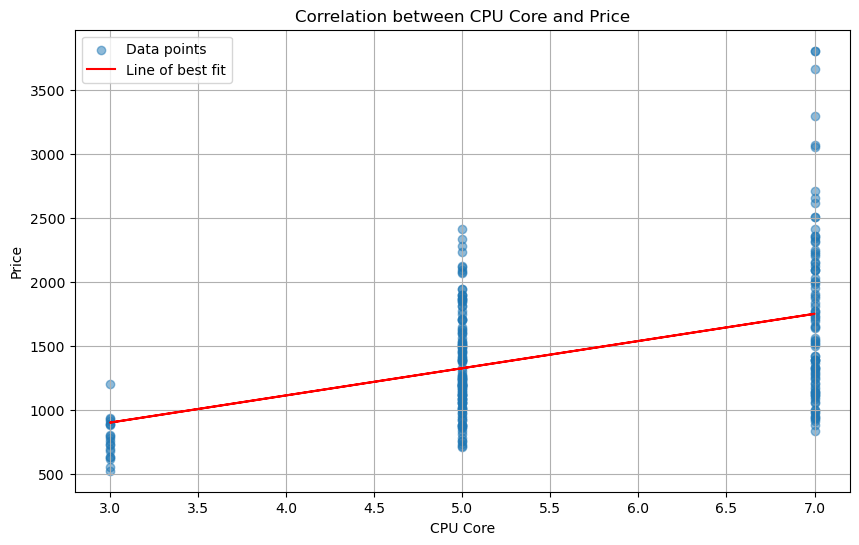

In [94]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Data points')
plt.title('Correlation between CPU Core and Price')
plt.xlabel('CPU Core')
plt.ylabel('Price')

# Calculate the line of best fit
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red', label='Line of best fit')

# Add correlation coefficient to the plot
plt.legend()
plt.grid(True)
plt.show()

In [95]:
import scipy.stats as stats

df.Weight_pounds.corr(df.Price)

-0.05031225837751541

In [96]:
import pandas as pd
from scipy.stats import pearsonr

# Convert columns to numeric types, forcing errors to NaN
df["CPU_core"] = pd.to_numeric(df["CPU_core"], errors='coerce')
df["Price"] = pd.to_numeric(df["Price"], errors='coerce')

# Drop rows with NaN values in either column
df = df.dropna(subset=["CPU_core", "Price"])

# Extract the relevant columns
x = df["CPU_core"]
y = df["Price"]

# Calculate the Pearson correlation coefficient
res = pearsonr(x, y)

print("Pearson correlation coefficient:", res[0])
print("P-value:", res[1])


Pearson correlation coefficient: 0.45939777733551157
P-value: 7.912950127009034e-14


## Train a linear reggresion model

In [97]:
df.columns

Index(['Manufacturer', 'Category', 'GPU', 'OS', 'CPU_core', 'Screen_Size_inch',
       'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'Weight_pounds', 'Price',
       'Price-binned', 'Screen-Full_HD', 'Screen-IPS_panel'],
      dtype='object', name=0)

In [98]:
# Separate features and labels
X = df[ ["Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"]]
y = df["Price"]
print('Features:', X.head(10), '\nLabels:', y.head(10), sep='\n')


Features:
0   Category  GPU   OS  CPU_core  RAM_GB  Storage_GB_SSD
1        4.0  2.0  1.0       5.0     8.0           256.0
2        3.0  1.0  1.0       3.0     4.0           256.0
3        3.0  1.0  1.0       7.0     8.0           256.0
4        4.0  2.0  1.0       5.0     8.0           128.0
5        4.0  2.0  1.0       7.0     8.0           256.0
6        3.0  1.0  1.0       5.0     8.0           256.0
7        3.0  3.0  1.0       5.0     8.0           256.0
8        3.0  2.0  1.0       5.0     4.0           256.0
9        3.0  1.0  1.0       5.0     4.0           256.0
10       3.0  3.0  1.0       7.0     8.0           256.0

Labels:
1      978
2      634
3      946
4     1244
5      837
6     1016
7     1117
8      866
9      812
10    1068
Name: Price, dtype: int64


In [99]:
y = df['Price']
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
0   Category  GPU   OS  CPU_core  RAM_GB  Storage_GB_SSD
1        4.0  2.0  1.0       5.0     8.0           256.0
2        3.0  1.0  1.0       3.0     4.0           256.0
3        3.0  1.0  1.0       7.0     8.0           256.0
4        4.0  2.0  1.0       5.0     8.0           128.0
5        4.0  2.0  1.0       7.0     8.0           256.0
6        3.0  1.0  1.0       5.0     8.0           256.0
7        3.0  3.0  1.0       5.0     8.0           256.0
8        3.0  2.0  1.0       5.0     4.0           256.0
9        3.0  1.0  1.0       5.0     4.0           256.0
10       3.0  3.0  1.0       7.0     8.0           256.0

Labels:
1      978
2      634
3      946
4     1244
5      837
6     1016
7     1117
8      866
9      812
10    1068
Name: Price, dtype: int64


In [100]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 166 rows
Test Set: 72 rows


In [101]:
# Train the model
from sklearn.linear_model import LinearRegression

In [102]:

model = LinearRegression().fit(X_train, y_train)

In [103]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [1573. 1529. 1762.  784. 1473. 1762. 1340.  972. 1851. 1573.]
Actual labels   :  179    1904
154    1777
107    1905
112     761
126    1286
226    2096
123    2124
215    1607
46     1371
195    1904
Name: Price, dtype: int64


In [104]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 219474.78318156803
RMSE: 468.4813584141508
R2: 0.3704728804553905
